In [1]:
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.cluster import *
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from numpy import append
from sklearn import metrics
from sklearn.model_selection import train_test_split
import cv2 
import os

In [2]:
from sklearn.datasets import load_digits

In [3]:
data, labels = load_digits(return_X_y=True)
(n_samples, n_features) = data.shape
n_digits = np.unique(labels).size
print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [4]:
def bench_k_means(kmeans, name, data, labels):
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]
    
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    
    
    for m in clustering_metrics:
        results.append(m(labels, estimator[-1].labels_))
        
    results += [
        silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]
    
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))
 
    

In [5]:
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)


init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.282s	69545	0.598	0.645	0.621	0.469	0.617	0.158
random   	0.139s	69735	0.681	0.723	0.701	0.574	0.698	0.182
PCA-based	0.037s	72686	0.636	0.658	0.647	0.521	0.643	0.146


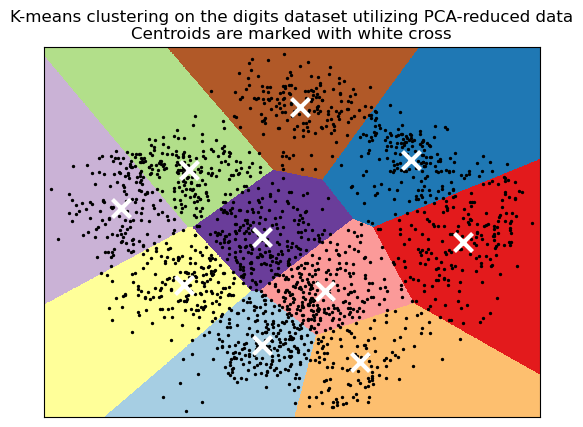

In [6]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)


h = 0.05  

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s = 2, c = 'black')
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset utilizing PCA-reduced data\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [7]:
import os
from PIL import Image

In [9]:
root_directory = 'C:\\Users\\agrim\\Python_Projects\\AI_Learning-Research\\Clustering\\raw-img'


data = []
labels = []

label_numbers = {}
next_label_number = 0


for subdir, dirs, files, in os.walk(root_directory):
    for file in files:
         if file.endswith(('.jpg', '.jpeg', '.png')):
            label = os.path.basename(subdir)
            
            if label not in label_numbers:
                label_numbers[label] = next_label_number
                next_label_number += 1
                
            image_path = os.path.join(root_directory, subdir, file)
            img = Image.open(image_path)
            newsize = (128,128)
            img = img.resize(newsize)
            img = img.convert('RGB')
            img_array = np.array(img)
            
            data.append(img_array.flatten())
            labels.append(label_numbers[label])
            
            

In [10]:
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=3, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=3).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=3, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)


init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	27.646s	212492880	0.043	0.048	0.045	0.032	0.045	0.085
random   	26.747s	212492939	0.043	0.048	0.045	0.033	0.045	0.090
PCA-based	11.244s	212493613	0.044	0.049	0.046	0.034	0.046	0.101


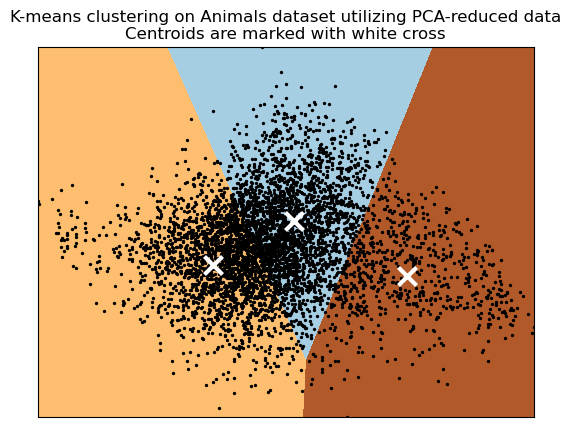

In [11]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=10)
kmeans.fit(reduced_data)


h = 5

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure(1)
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s = 2, c = 'black')

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on Animals dataset utilizing PCA-reduced data\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [13]:
root_directory = 'C:\\Users\\agrim\\Python_Projects\\AI_Learning-Research\\Clustering\\raw-img'

sift = cv2.xfeatures2d.SIFT_create(128)

features = []
labels = []

label_numbers = {}
next_label_number = 0


for subdir, dirs, files, in os.walk(root_directory):
    for file in files:
         if file.endswith(('.jpg', '.jpeg', '.png')):
            label = os.path.basename(subdir)
            
            if label not in label_numbers:
                label_numbers[label] = next_label_number
                next_label_number += 1
                
            image_path = os.path.join(root_directory, subdir, file)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            dim = (123,128)
            img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            keypoints, descriptors = sift.detectAndCompute(img, None)
            
            if descriptors is not None:
                features.extend(descriptors)
                labels.extend([label_numbers[label]] * len(descriptors))


In [14]:
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=features, labels=labels)

kmeans = KMeans(init="random", n_clusters=3, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=features, labels=labels)

pca = PCA(n_components=3).fit(features)
kmeans = KMeans(init=pca.components_, n_clusters=3, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=features, labels=labels)

init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	7.383s	71791721	0.001	0.001	0.001	0.001	0.001	0.072
random   	6.604s	71791715	0.001	0.001	0.001	0.001	0.001	0.064
PCA-based	3.186s	71791718	0.001	0.001	0.001	0.001	0.001	0.064


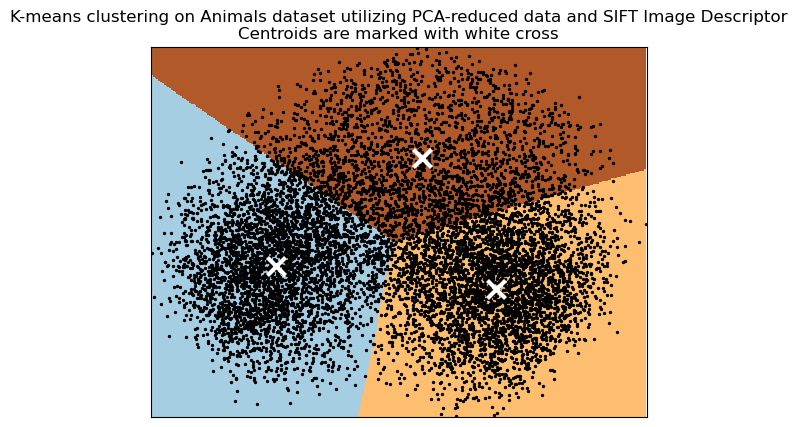

In [17]:
reduced_data = PCA(n_components=2).fit_transform(features[:10000])
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=10)
kmeans.fit(reduced_data)


h = 2

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure(1)
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s = 2, c = 'black')

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on Animals dataset utilizing PCA-reduced data and SIFT Image Descriptor\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()